# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df_clean = df.copy()

df_clean.columns = [c.lower() for c in df_clean.columns]

df_clean = df_clean.dropna(subset=['customerid'])

df_clean = df_clean[~df_clean['invoiceno'].astype(str).str.startswith('C')]

df_clean = df_clean[df_clean['quantity'] > 0]
df_clean = df_clean[df_clean['unitprice'] > 0]

df_clean['total_price'] = df_clean['quantity'] * df_clean['unitprice']

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    397884 non-null  object        
 1   stockcode    397884 non-null  object        
 2   description  397884 non-null  object        
 3   quantity     397884 non-null  int64         
 4   invoicedate  397884 non-null  datetime64[ns]
 5   unitprice    397884 non-null  float64       
 6   customerid   397884 non-null  float64       
 7   country      397884 non-null  object        
 8   total_price  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [19]:
print("Cleaned rows:", len(df_clean))
print("Original rows:", len(df))
df_clean.head()

Cleaned rows: 397884
Original rows: 541909


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [20]:
df_clean[['quantity', 'unitprice', 'total_price']].describe()

,quantity,unitprice,total_price
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,22.397000
std,179.331775,22.097877,309.071041
min,1.000000,0.001000,0.001000
25%,2.000000,1.250000,4.680000
50%,6.000000,1.950000,11.800000
75%,12.000000,3.750000,19.800000
max,80995.000000,8142.750000,168469.600000


In [21]:
customer_revenue = df_clean.groupby('customerid')['total_price'].sum()
customer_revenue.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: total_price, dtype: float64

In [22]:
product_revenue = df_clean.groupby('description')['total_price'].sum()
product_revenue.describe()


count      3877.000000
mean       2298.531830
std        6339.836893
min           0.003000
25%         115.900000
50%         585.000000
75%        1986.750000
max      168469.600000
Name: total_price, dtype: float64

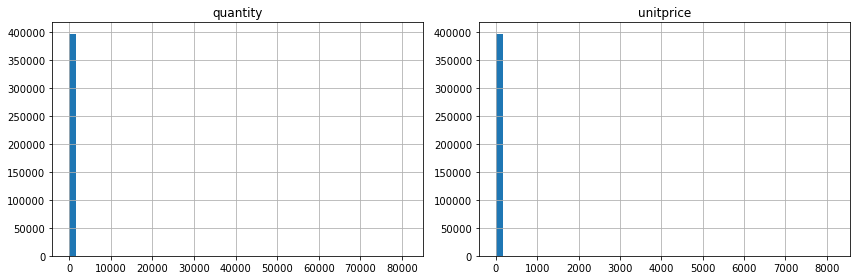

In [23]:
df_clean[['quantity', 'unitprice']].hist(figsize=(12,4), bins=50)
plt.tight_layout()
plt.show()

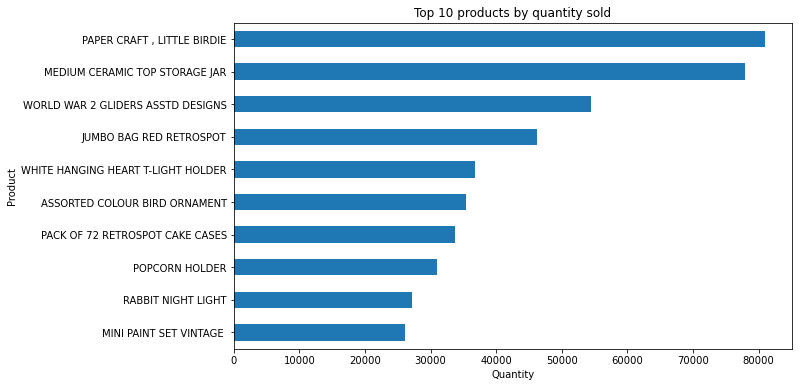

In [24]:
top_qty = (
    df_clean
    .groupby('description')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_qty.sort_values().plot(kind='barh')
plt.title("Top 10 products by quantity sold")
plt.xlabel("Quantity")
plt.ylabel("Product")
plt.show()

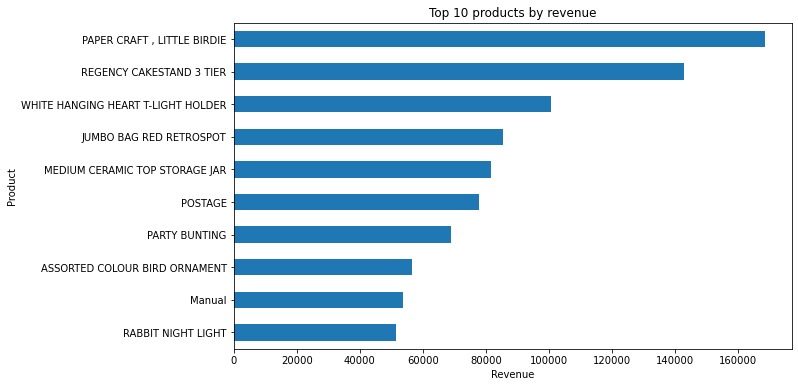

In [27]:
top_revenue = (
    df_clean
    .groupby('description')['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10,6))
top_revenue.sort_values().plot(kind='barh')
plt.title("Top 10 products by revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

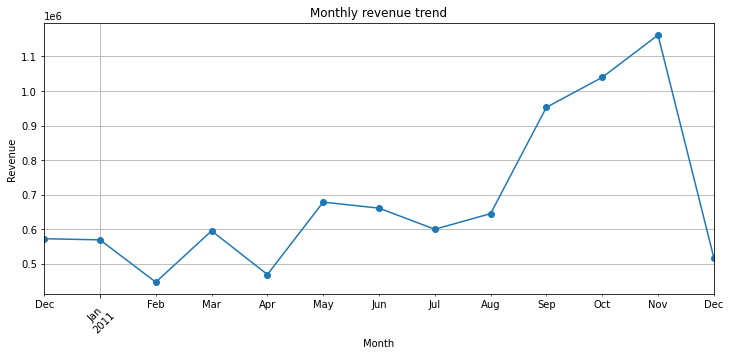

In [28]:
df_clean['invoice_month'] = df_clean['invoicedate'].dt.to_period('M')
monthly_revenue = df_clean.groupby('invoice_month')['total_price'].sum()

plt.figure(figsize=(12,5))
monthly_revenue.plot(marker='o')
plt.title("Monthly revenue trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

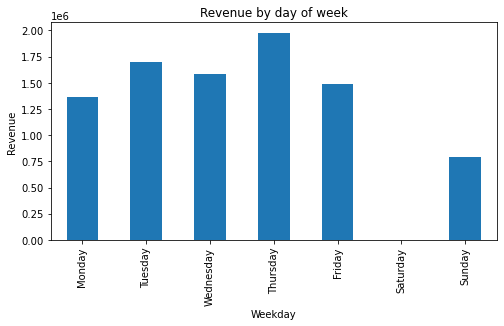

In [30]:
df_clean['weekday'] = df_clean['invoicedate'].dt.day_name()

weekday_revenue = (
    df_clean.groupby('weekday')['total_price']
    .sum()
    .reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
)

plt.figure(figsize=(8,4))
weekday_revenue.plot(kind='bar')
plt.title("Revenue by day of week")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.show()

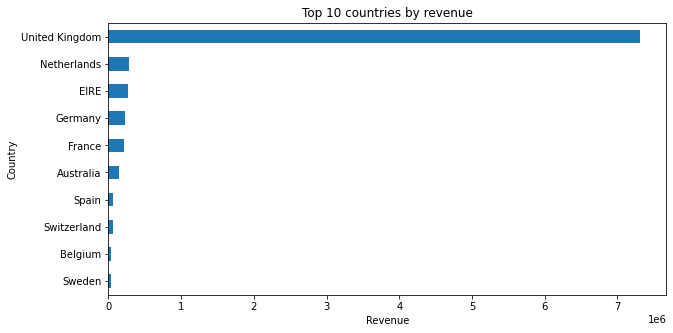

In [31]:
country_revenue = (
    df_clean.groupby('country')['total_price']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,5))
country_revenue.head(10).sort_values().plot(kind='barh')
plt.title("Top 10 countries by revenue")
plt.xlabel("Revenue")
plt.ylabel("Country")
plt.show()

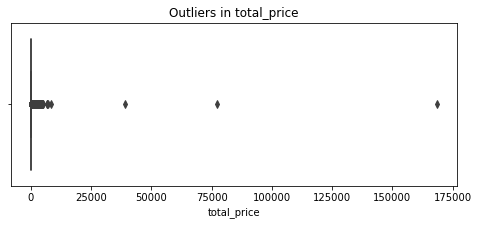

In [32]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df_clean['total_price'])
plt.title("Outliers in total_price")
plt.show()

In [34]:
threshold = df_clean['total_price'].quantile(0.99)
outliers = df_clean[df_clean['total_price'] > threshold]

print("Threshold:", threshold)
print("Number of outliers:", len(outliers))

outliers.head()

Threshold: 202.5
Number of outliers: 3969


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,total_price,invoice_month,weekday
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,204.00,2010-12,Wednesday
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,350.40,2010-12,Wednesday
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom,733.44,2010-12,Wednesday
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,647.04,2010-12,Wednesday
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,647.04,2010-12,Wednesday


Conclusions and Summary

In this project, I spent(a) exploratory analysis of online retail data for the period 2010-2011. I was able to study the data structure, identify the main trends, and understand which products, customers, and time periods contribute the most to sales.

1. General characteristics of the data

After clearing the data, there are approximately 398,000 records left. These are transactions of about 4.4 thousand customers and almost 3.8 thousand unique products. There are strong outliers in the data, especially in the number of products and the amount of orders, which indicates the presence of large, wholesale purchases.

2. Products that sell best

When analyzing sales by quantity and revenue, it turned out that the leading positions are occupied by the same products. For example: PAPER CRAFT, LITTLE BIRDIE; MEDIUM CERAMIC TOP STORAGE JAR; WHITE HANGING HEART T-LIGHT HOLDER. These products make up a significant portion of the revenue and can be considered key items in the store's product range.

3. Important customers

Revenue is unevenly distributed. Most of the customers place small orders, and only a small group of customers generates the bulk of their income. This confirms the principle of "20% of customers bring 80% of profits." You should pay special attention to such clients and work with them more personally.

4. Time patterns

Monthly sales show a marked increase in autumn, especially in November. This may be due to preparations for the holidays. According to the days of the week, the most sales occur on Thursday, and the lowest figures are on Monday and Sunday. This information allows for better planning of marketing activities and inventory management.

5. Emissions and large orders

Prices above about 280 pounds are classified as large orders. There are about four thousand such orders. These can be real wholesale purchases, as well as potential errors in the data, but most of them look natural.

6. Recommendations

Based on the analysis, the following recommendations can be made:
1)Monitor the availability of leading products to avoid shortages.;
2)work with large clients individually, offering personal promotions;
3)make more active use of the autumn months and Thursdays to host marketing campaigns;
4)regularly check large orders to eliminate errors and improve the service of wholesale customers.

7. Possible directions for further work

In the future, you can segment customers, for example, using RFM analysis, build a demand forecast for key products, and study seasonal effects in more detail.
This project helped me better understand how analytics works in online retail and improve my skills working with data, visualizations, and EDA tools.